In [1]:
from util import *
from generation import *
from swarm import *
from metrics import *
from position_export import *

from multiprocess.pool import ThreadPool

import random
import time
from IPython import display
import pylab as pl


In [2]:
conciliation_quota  = 0.5

critical_amount     = 100

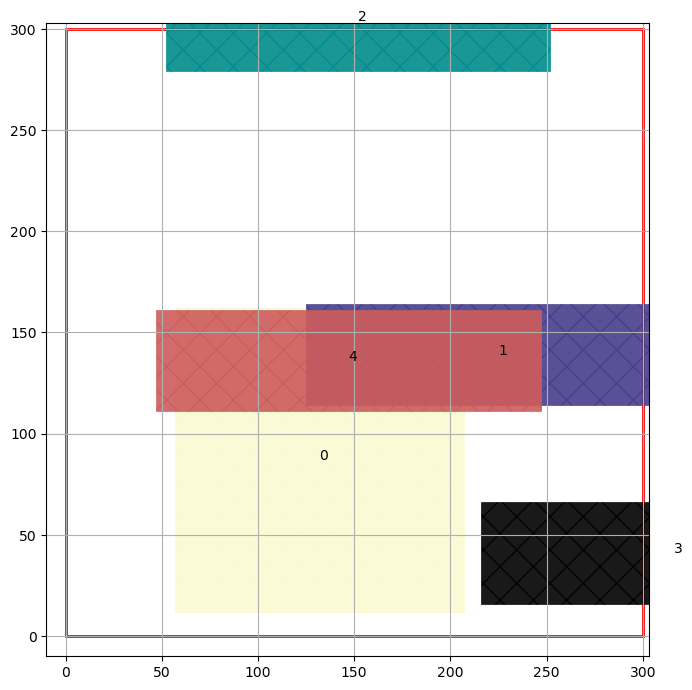

In [3]:
# #Random small
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 70, "height" : 70}
# participants        = generate_unconnected_participants(10, layout_zone, 30, 30, 666)
# ds_goal             = 20.0

# #Random
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
# participants        = generate_unconnected_participants(20, layout_zone, 30, 30, 666)
# ds_goal             = 15.0

# #Random with nets
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
# participants        = generate_connected_participants(20, 10, 3, layout_zone, 30, 30, 69)
# ds_goal             = 10.0

# # Perfect square
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
# participants        = generate_unconnected_equal_quadratic_participants(9, layout_zone, 31, 420)
# ds_goal             = 0.48

# Wheel
layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 300, "height" : 300}
participants        = generate_unconnected_wheel_participants(layout_zone, 100, 42) 
ds_goal             = 0.48


plot_size           = 1.01 * layout_zone["width"]


a = plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections= True)


In [4]:
participants            = determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

print('Participant Area: ' + str(calculate_all_participants_area(participants)))

Participant Area: 62500.0


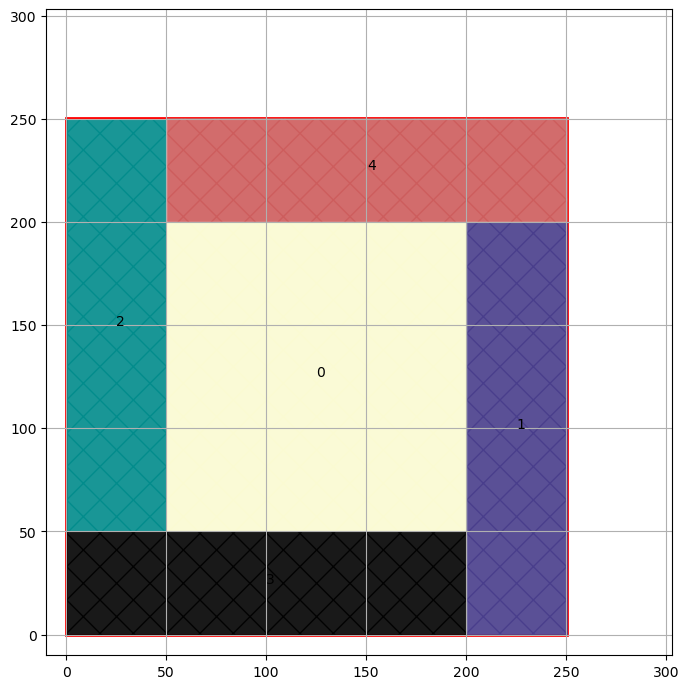

One Round of Interaction took: 0.02353215217590332 seconds


In [5]:
id_list = [p['idx'] for p in (participants.values())]

my_cool_pool = ThreadPool(2)

with my_cool_pool as mcp:

    for i in range(500): # maximum rounds of interaction

        participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount, mcp)

        plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections=True)

        print('One Round of Interaction took: ' + str(runtime) + ' seconds')

        last_moves = {key : value['last-move'] for key,value in participants.items()}

        moves = list(last_moves.values())

        #print(participants['0']['interference'])
        #print(participants['0']['relaxed-connections'])
        #print(last_moves)

        if moves.count('linger')  == len(participants):    

            ds = calculate_dead_space(participants, layout_zone)  

            #print('Current deadspace : ' + str(ds) + ' %') 

            if ds < ds_goal:
                break

            layout_zone         = scale_layout_zone(layout_zone, 0.99) 

            participants        = reset_after_tightening(participants)

        # for i in range(len(participants)):
        #     print(participants[str(i)]['last-move'])


In [6]:
participants    	= determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

for i in range(len(participants)):
    print(participants[str(i)]['overlap-with-idx'])

[]
[]
[]
[]
[]


In [7]:
ds = calculate_dead_space(participants, layout_zone)

print("Dead Space: " + str(ds) + " %")

Dead Space: 0.28270192955889684 %


In [8]:
# Export to csv

positions2csv(participants, layout_zone)

In [9]:
# from matplotlib import colors

# import pandas as pd

# df = pd.DataFrame.from_dict(participants, orient = 'index')

# df['color_hex'] = [colors.to_hex(x) for x in list(df['color'].values)]

# df